In [11]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Importing the data
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
data.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
# Employing the UCB algorithm

N = 10000 # number of users
d = 10 # number of ads

ads_selected = []
total_reward = 0
Ni = np.zeros(d) # number of selections
Ri = np.zeros(d) # sum of rewards

In [8]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if Ni[i] > 0: # This if statement takes care of the first iteration, where no ad has been selected
            ri = Ri[i] / Ni[i]
            delta_i = np.sqrt(3/2 * np.log(n + 1) / Ni[i])
            upper_bound = ri + delta_i
        else:
            upper_bound = 1e400 # this is like using infinity
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    ads_selected.append(ad)
    Ni[ad] += 1
    Ri[ad] += data.values[n,ad]
    total_reward += data.values[n,ad]

Text(0, 0.5, 'Number of times each ad was selected')

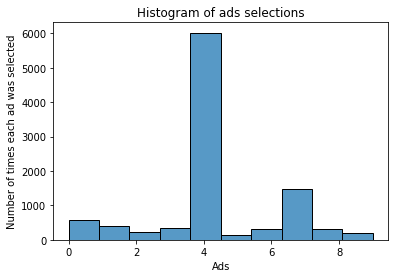

In [16]:
sns.histplot(ads_selected, bins=10)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')